In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset/data.csv")
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     15079 non-null  str  
 1   Age             15079 non-null  int64
 2   Gender          15079 non-null  str  
 3   Annual Income   15079 non-null  int64
 4   Spending Score  15079 non-null  int64
dtypes: int64(3), str(2)
memory usage: 589.2 KB


In [3]:
data.head()

Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76

In [4]:
data.drop(columns="Customer ID",inplace=True)
data['Gender'] = data['Gender'].astype('category').cat.codes
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             15079 non-null  int64
 1   Gender          15079 non-null  int8 
 2   Annual Income   15079 non-null  int64
 3   Spending Score  15079 non-null  int64
dtypes: int64(3), int8(1)
memory usage: 368.3 KB


In [5]:
df = data.copy()
df.head()

Age  Gender  Annual Income  Spending Score
0   30       1         151479              89
1   58       0         185088              95
2   62       0          70912              76
3   23       1          55460              57
4   24       1         153752              76

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['Annual Income'] = scaler.fit_transform(data[['Annual Income']])
data['Spending Score'] = scaler.fit_transform(data[['Spending Score']])
data.head()

Age  Gender  Annual Income  Spending Score
0 -1.145516       1       0.798813        1.337059
1  0.180335       0       1.442076        1.545929
2  0.369742       0      -0.743208        0.884507
3 -1.476979       1      -1.038953        0.223086
4 -1.429627       1       0.842317        0.884507

In [7]:
from sklearn.cluster import KMeans

errors = []

for i in range(1,15):
    kmeans = KMeans(    
            n_clusters=i,
            init='k-means++',
            max_iter=20,
            random_state=42
        )
    kmeans.fit(data)
    errors.append(kmeans.inertia_)
errors

[49006.545725843906,
 37698.0226702611,
 30804.585081741036,
 25277.498884963643,
 21924.81663297787,
 18657.663884018442,
 16826.319499819958,
 15084.685025026958,
 14435.549804942797,
 13915.299561368902,
 13371.706491796209,
 12856.434514450211,
 12393.1865298066,
 12056.562936984918]

Text(0, 0.5, 'Errors')

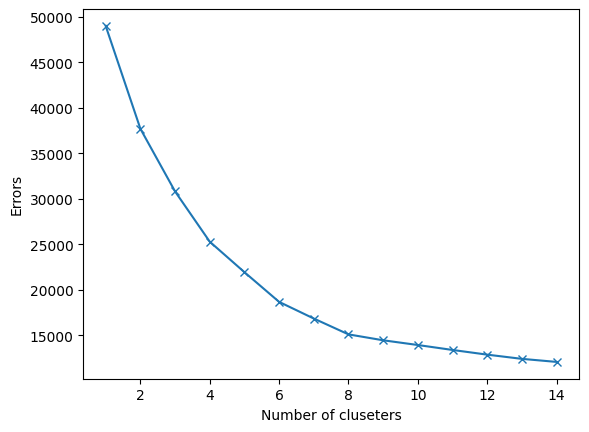

In [8]:
plt.plot(range(1,15),errors,marker='x')
plt.xlabel("Number of cluseters")
plt.ylabel("Errors")

In [9]:
kmeans = KMeans(
    n_clusters=5,
    random_state=42
)

clusters = kmeans.fit_predict(data)
df['clusters'] = clusters

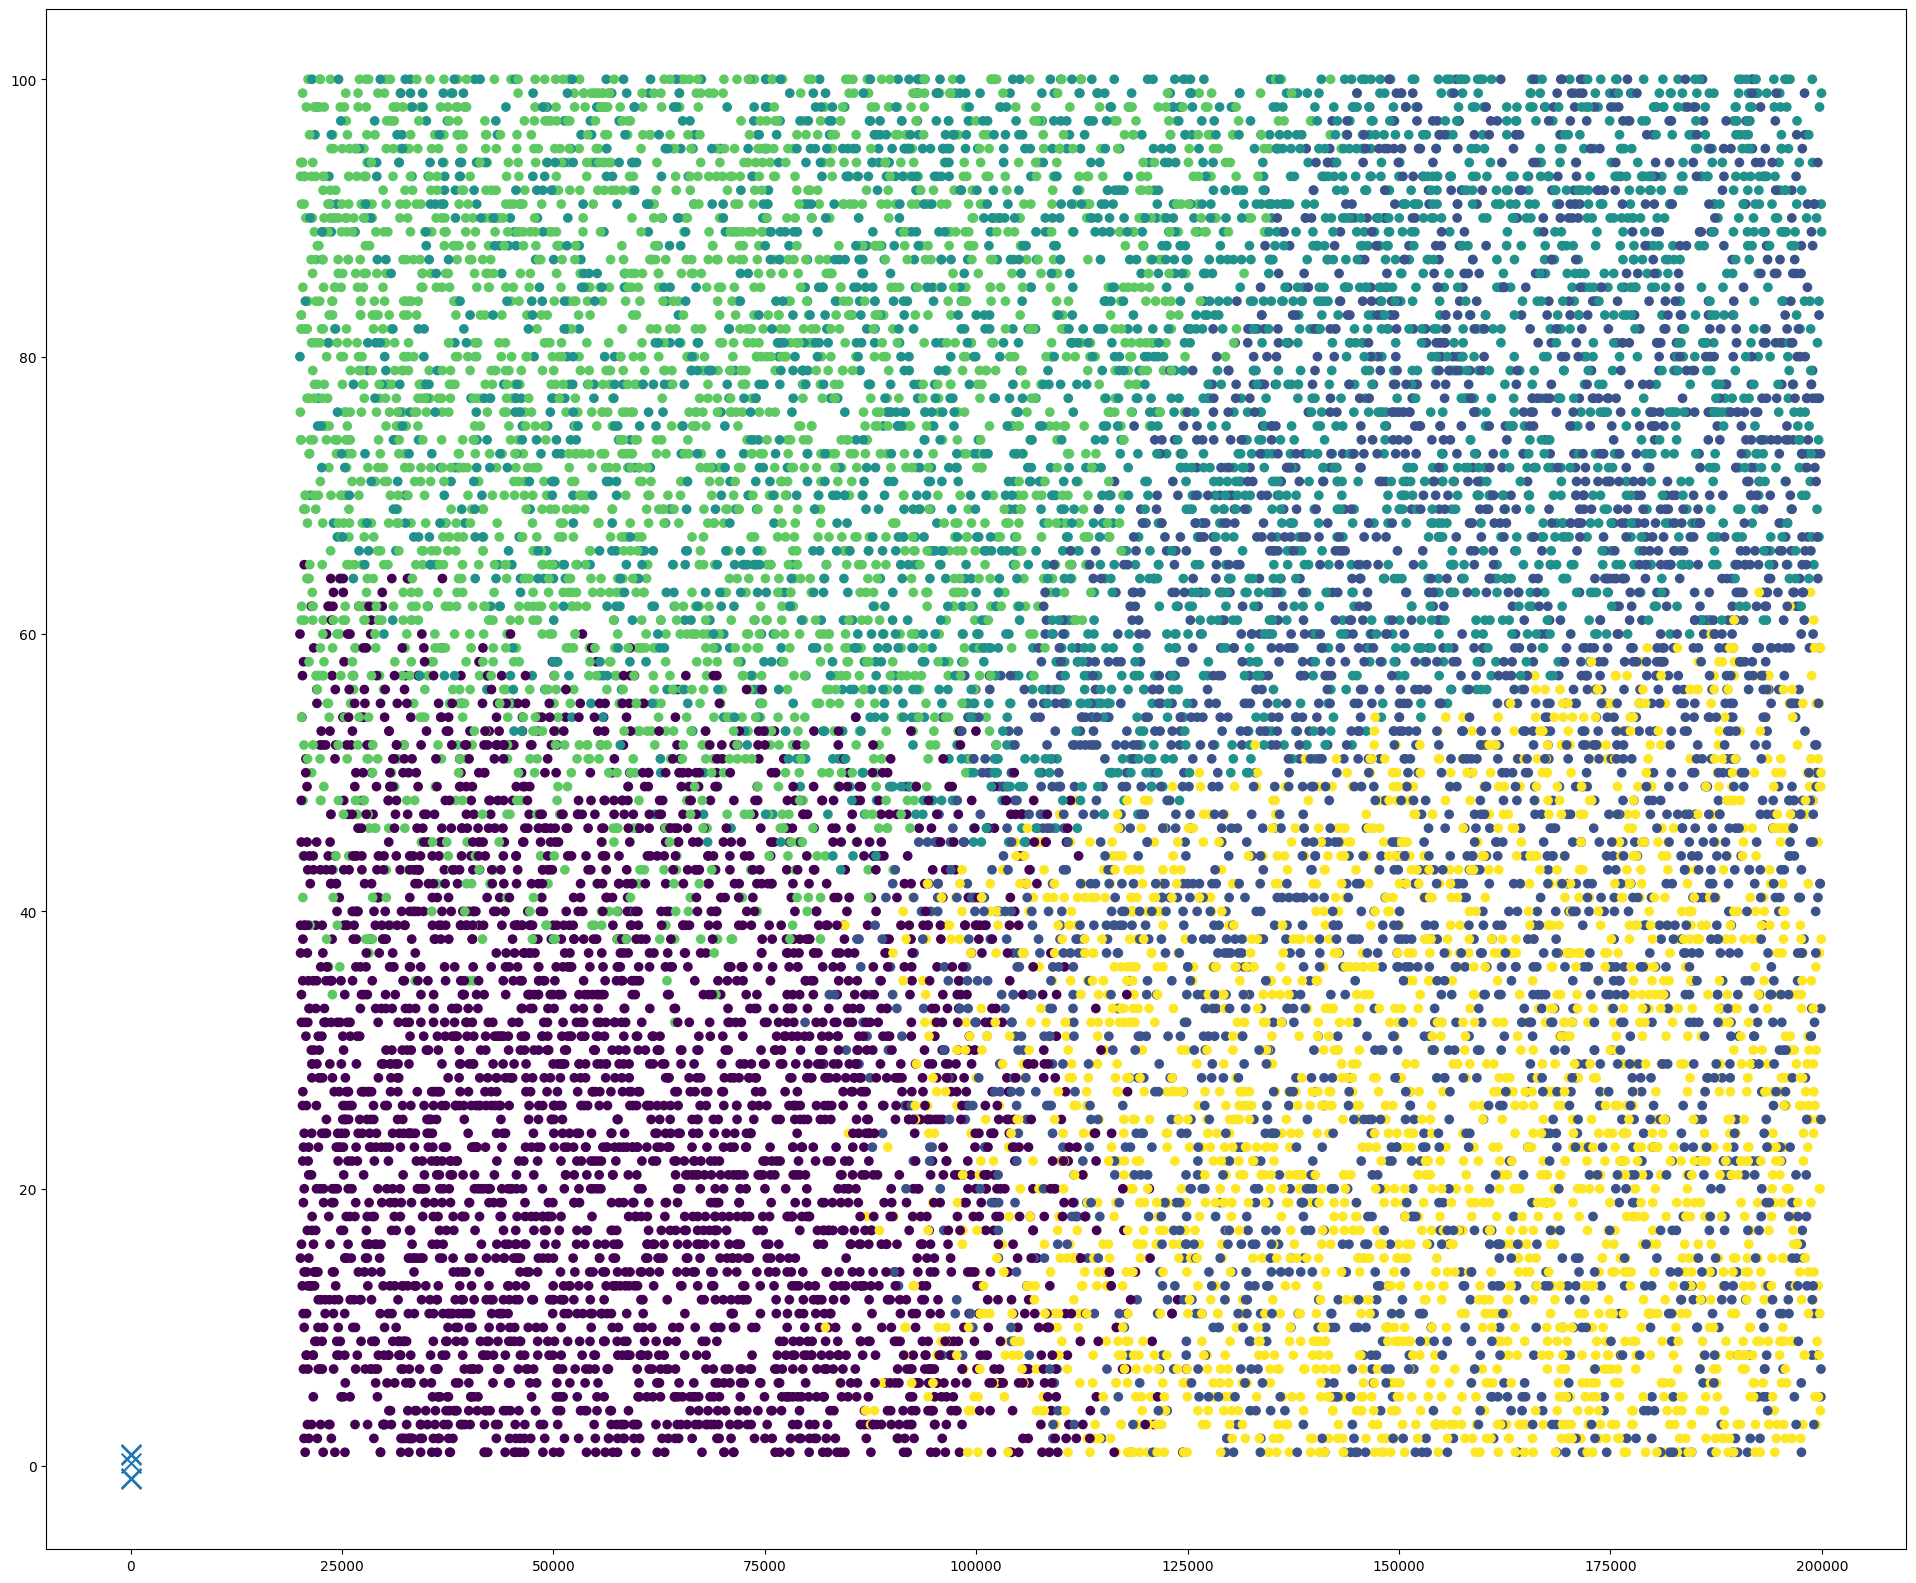

In [10]:
plt.figure(figsize=(24,20))

plt.scatter(
    df['Annual Income'],
    df['Spending Score'],
    c=df['clusters']
)

plt.scatter(
    kmeans.cluster_centers_[:,1],
    kmeans.cluster_centers_[:,2],
    marker='x',
    s=200
)

plt.show()

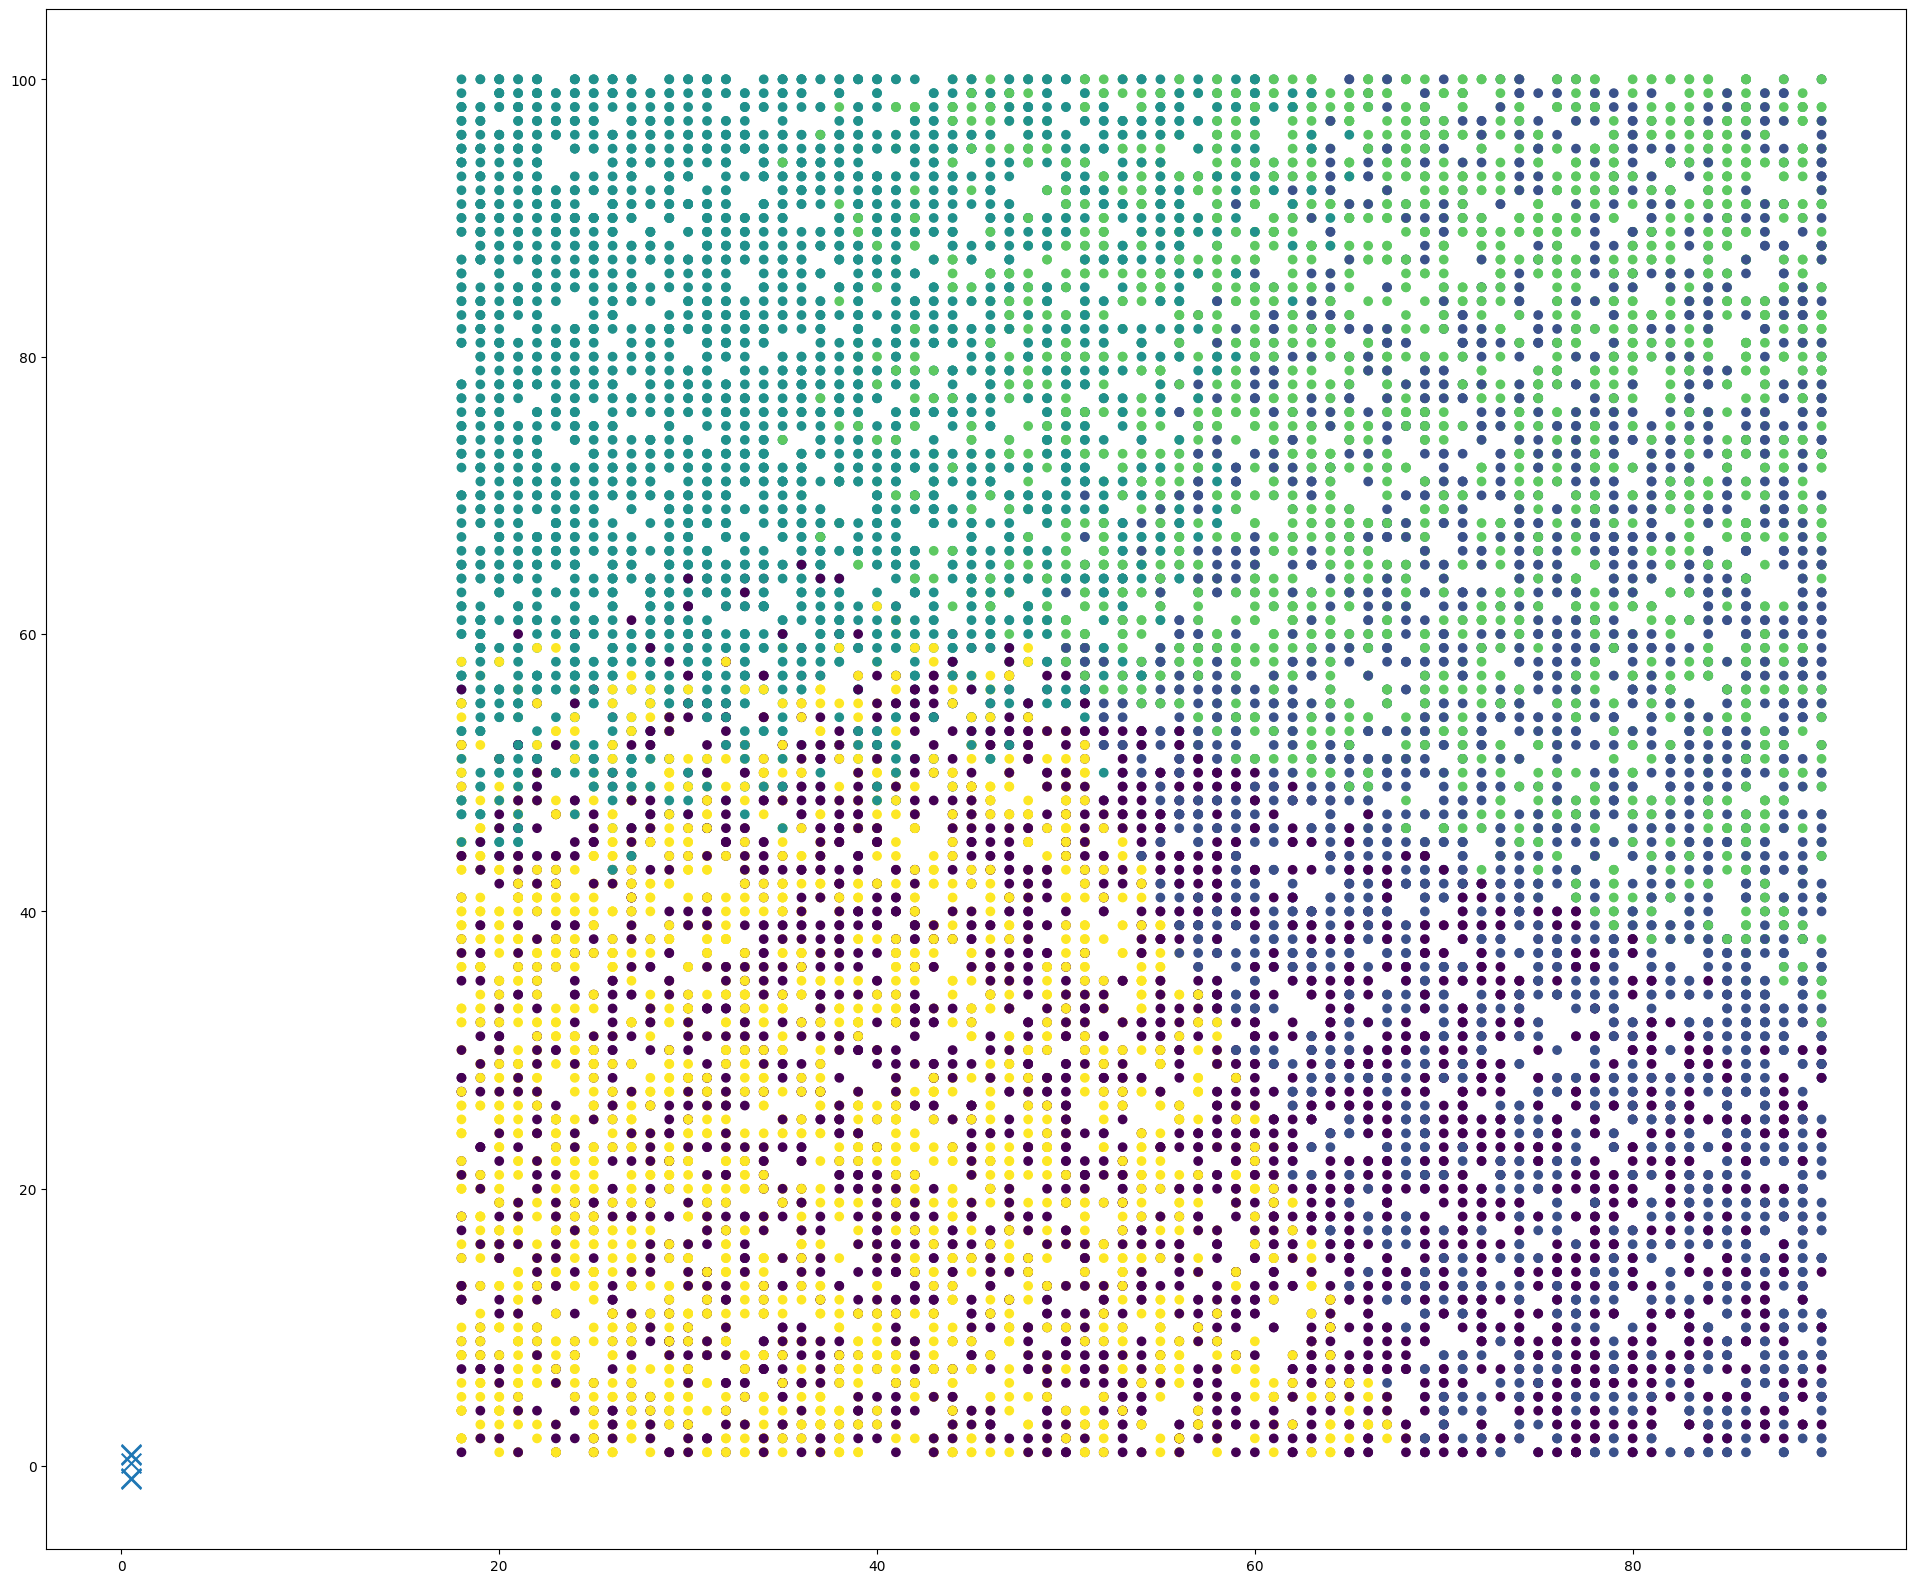

In [11]:
plt.figure(figsize=(24,20))

plt.scatter(
    df['Age'],
    df['Spending Score'],
    c=df['clusters']
)

plt.scatter(
    kmeans.cluster_centers_[:,1],
    kmeans.cluster_centers_[:,2],
    marker='x',
    s=200
)

plt.show()

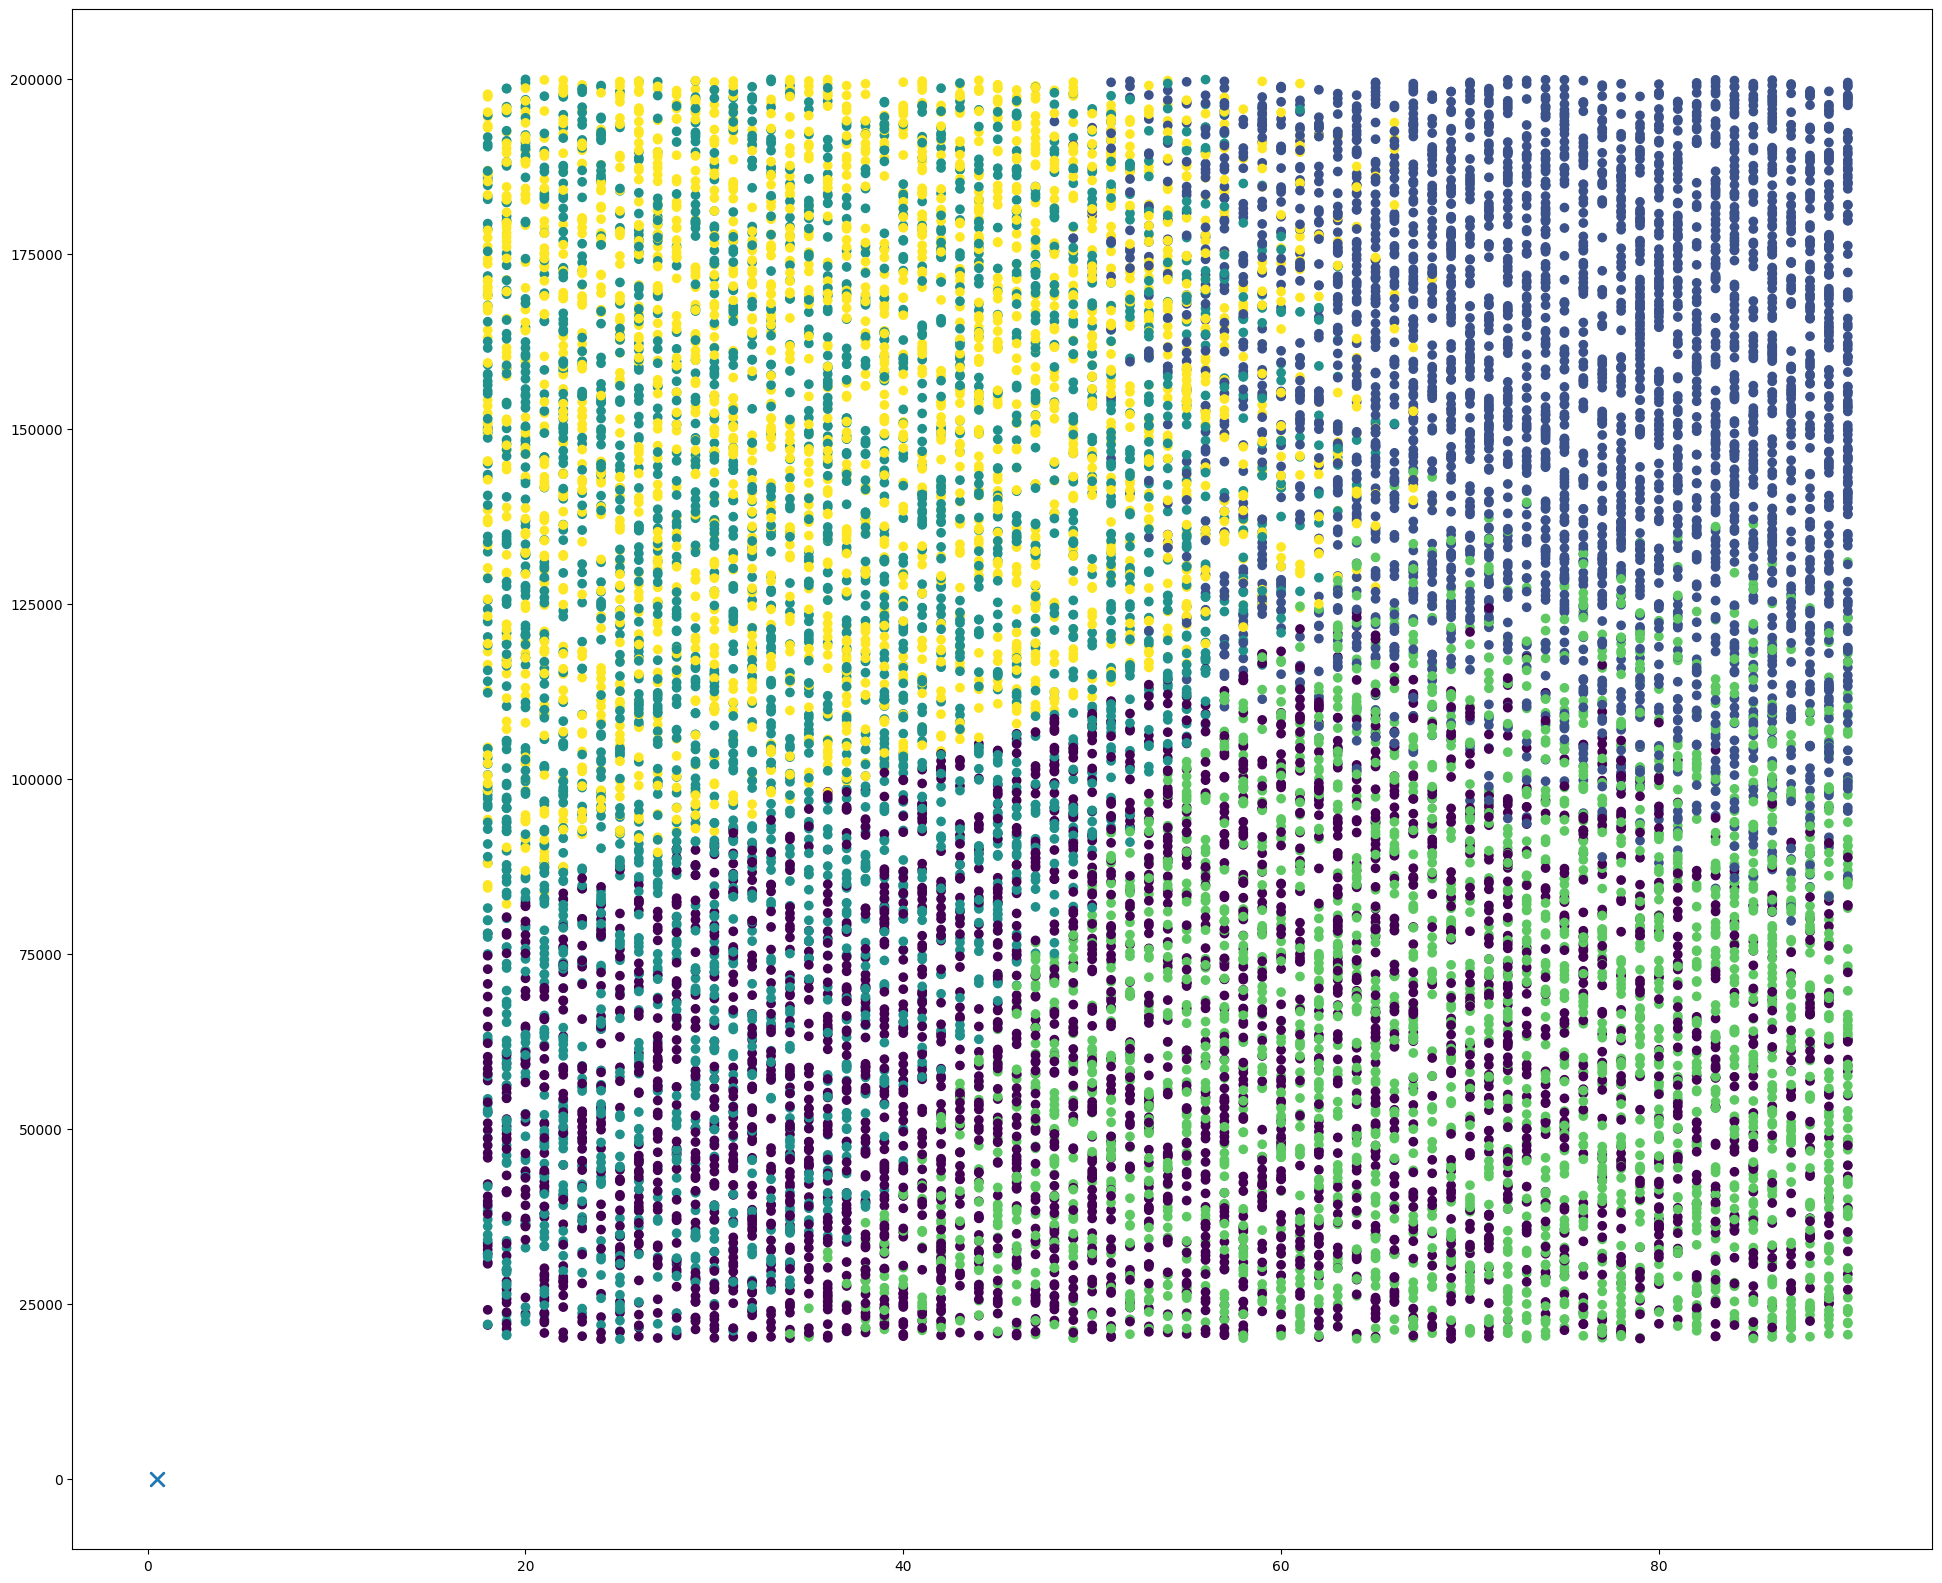

In [12]:
plt.figure(figsize=(24,20))

plt.scatter(
    df['Age'],
    df['Annual Income'],
    c=df['clusters']
)

plt.scatter(
    kmeans.cluster_centers_[:,1],
    kmeans.cluster_centers_[:,2],
    marker='x',
    s=100
)

plt.show()